In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from matplotlib.axes._axes import _log as matplotlib_axes_logger

In [3]:
matplotlib_axes_logger.setLevel('ERROR')
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 16, 8

In [5]:
file_path = "../data/eda_ts_data.csv"

In [6]:
df = pd.read_csv(file_path)
df["ds"] = pd.to_datetime(df["ds"])

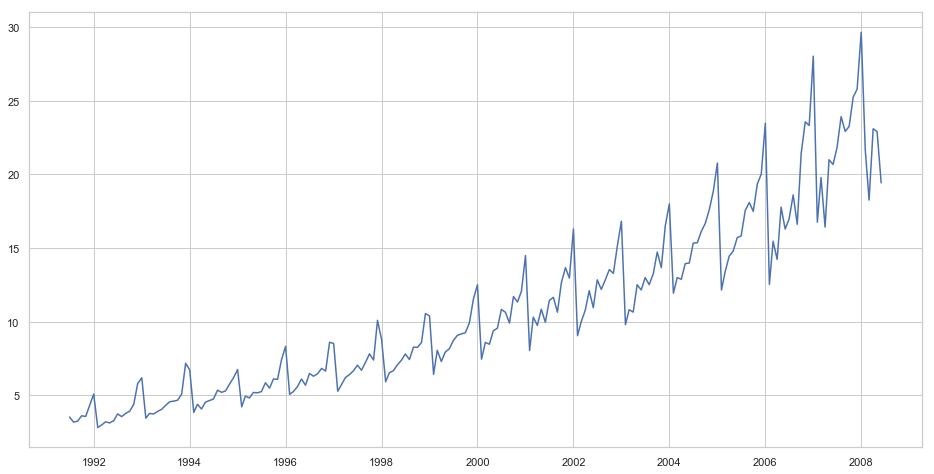

In [10]:
plt.plot(df['ds'],df['y'])

In [11]:
df["year"] = df["ds"].dt.year
df["month"] = df["ds"].dt.strftime('%b')
df.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [13]:
df.set_index('ds', inplace=True)

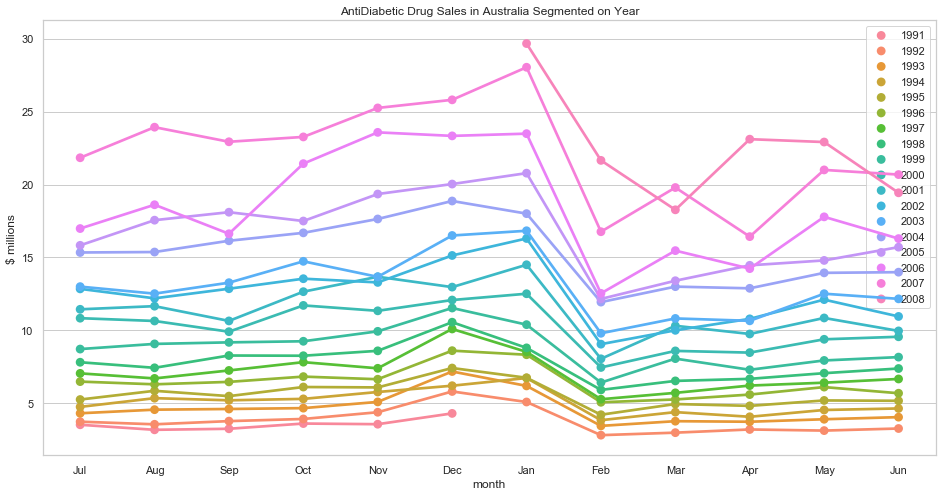

In [15]:
sns.pointplot(x="month", y="y", hue="year", data=df)
plt.xlabel("month")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia Segmented on Year")
plt.legend(loc='upper right')

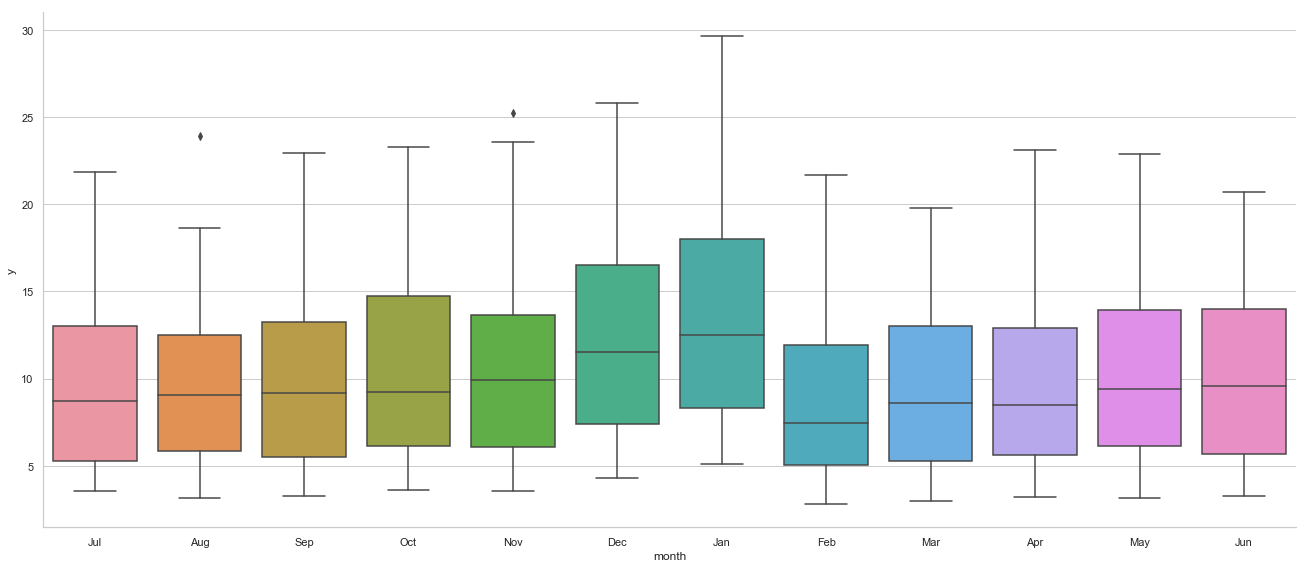

In [17]:

sns.factorplot(x="month", y="y", data=df, kind="box", size=8, aspect=float(16/7))

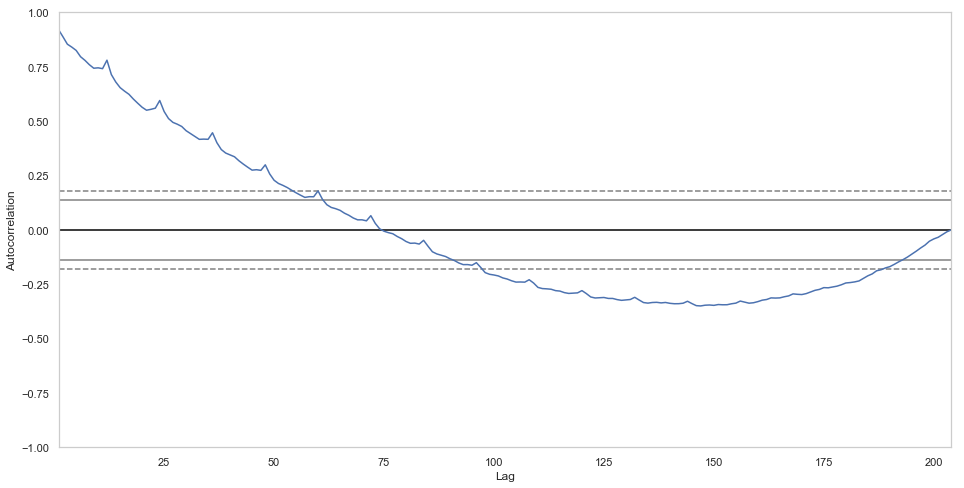

In [20]:
# Autocorrelation plot for time series
autocorrelation_plot(df["y"])

In [23]:
orig_series = df['y'].values
df['y_flipped'] = orig_series[::-1]

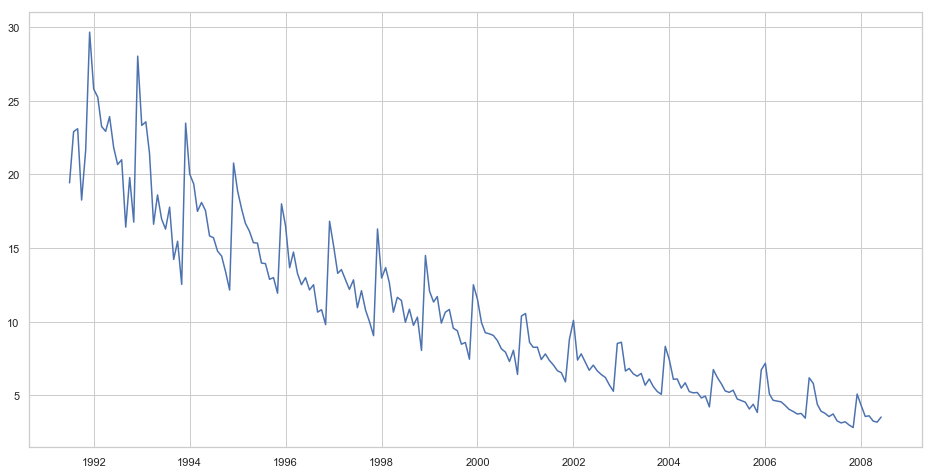

In [24]:
plt.plot(df['y_flipped'])

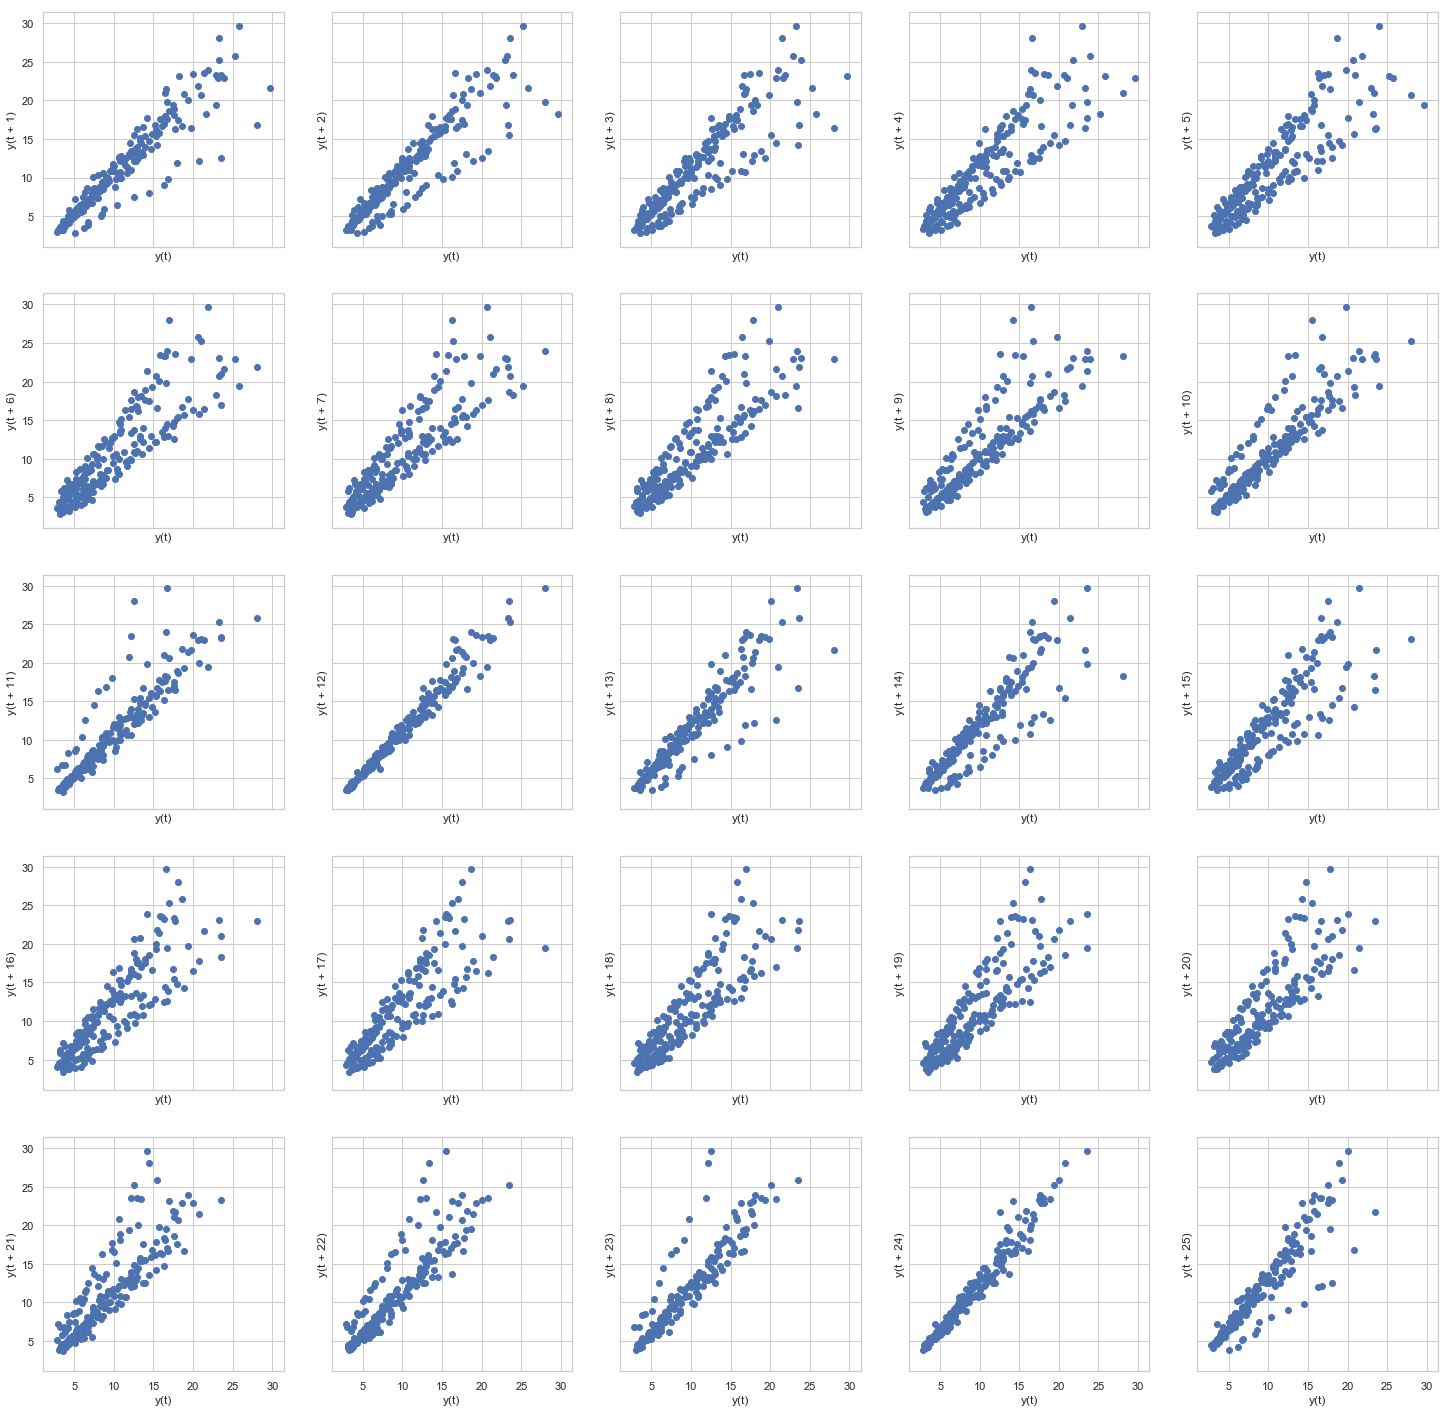

In [25]:
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(df["y"], lag=count, ax=axes[i, j])
        count+=1

In [31]:
df.shape

(204, 4)

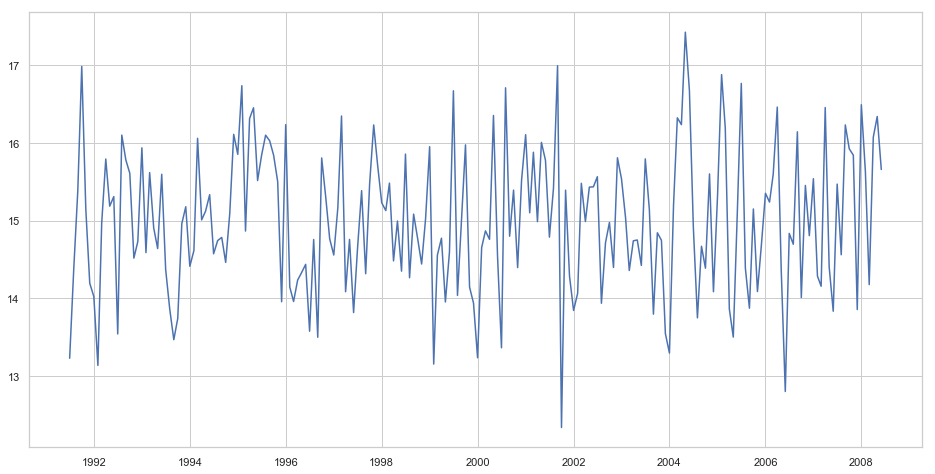

In [32]:
df['level_series'] = np.random.normal(15, 1, 204)
plt.plot(df['level_series'])

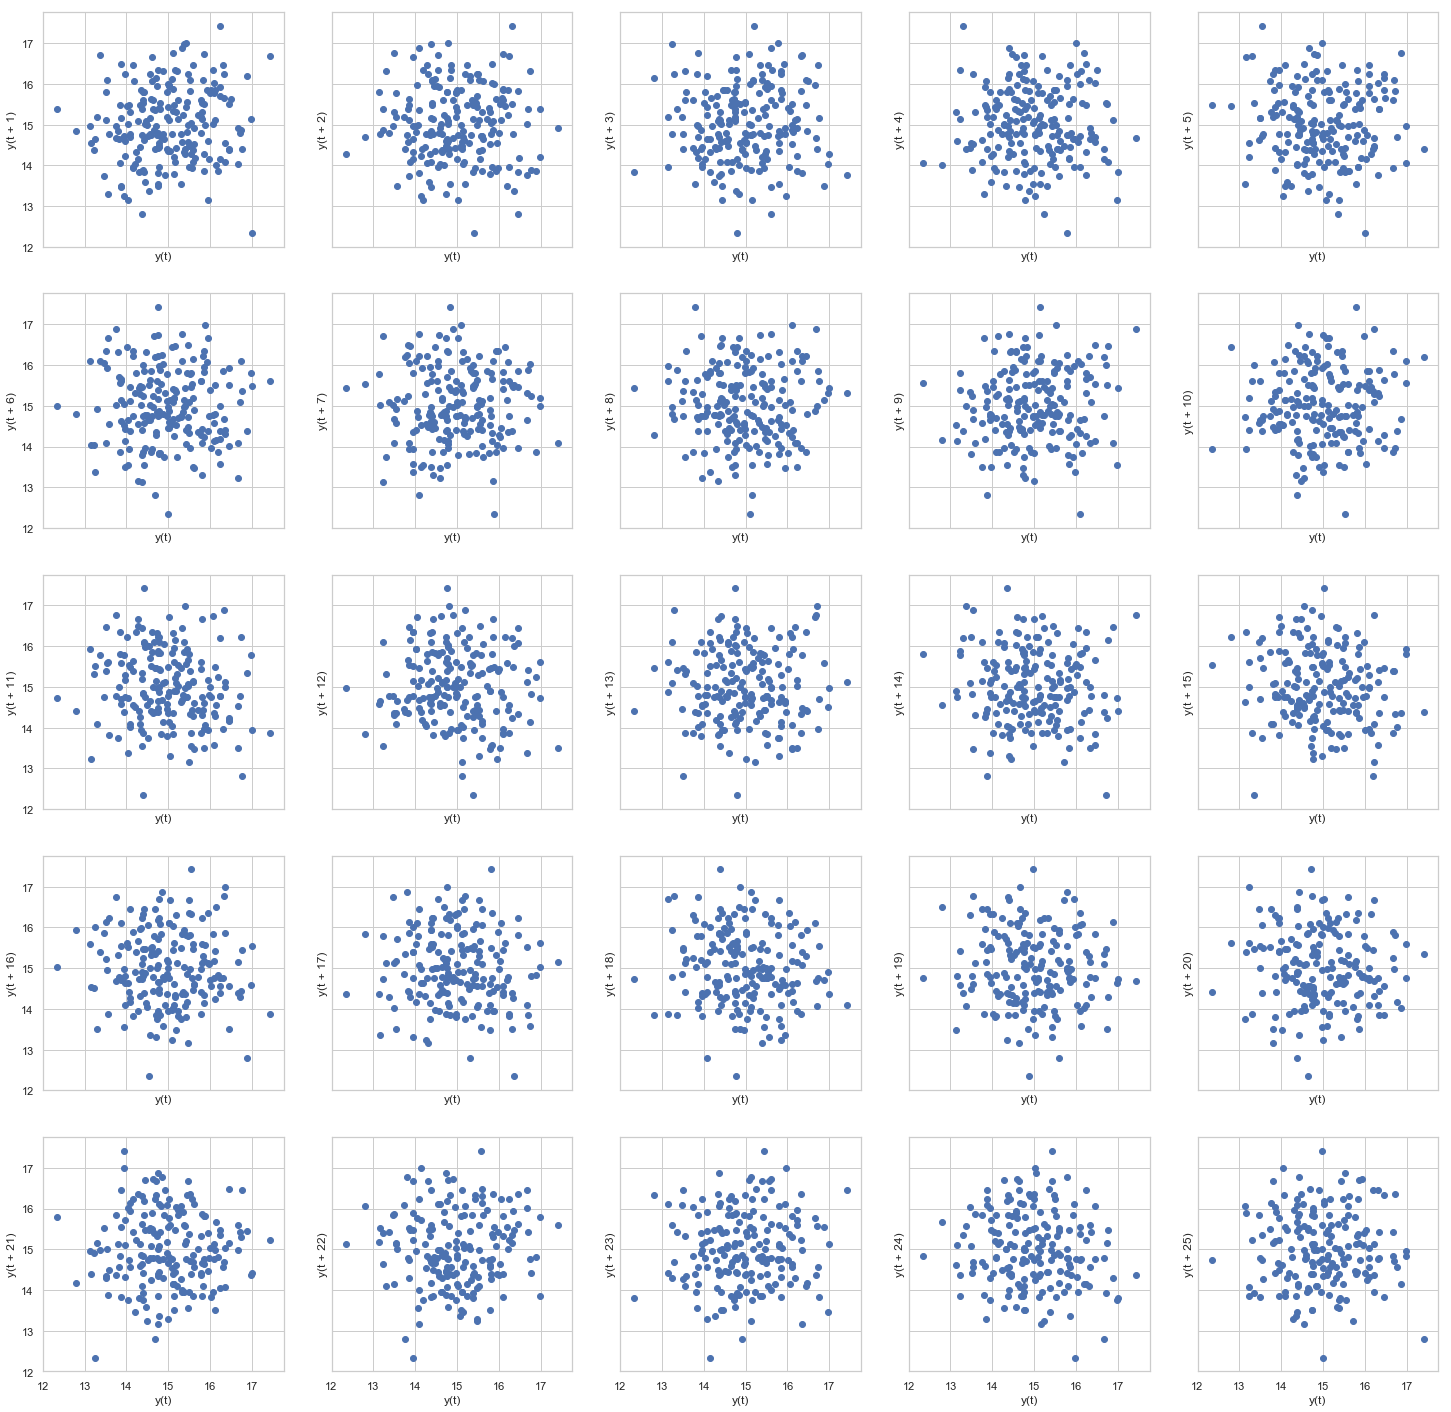

In [33]:

plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(df["level_series"], lag=count, ax=axes[i, j])
        count+=1